In [1]:
import jax.numpy as np
from jax import random, grad, jit
import matplotlib.pyplot as plt

In [2]:
key = random.PRNGKey(0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


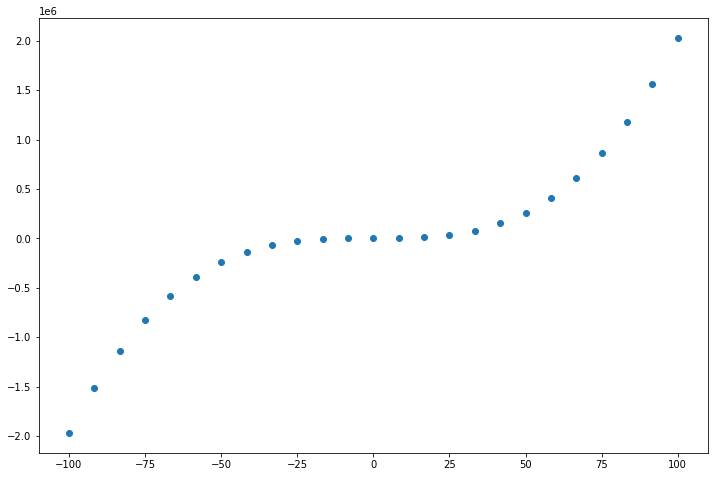

In [3]:
x = np.linspace(-100, 100, 25)
y = 2*x**3 + 3*x**2 + 4*x + 10
plt.figure(figsize=(12, 8))
plt.scatter(x, y)

In [4]:
key, split_key = random.split(key, 2)
theta = random.normal(split_key, shape=(4,))

In [5]:
def predict(theta, x):
    return theta[0]*x**3 + theta[1]*x**2 + theta[2]*x + theta[3]

In [6]:
def loss(theta, x, y):
    y_hat = predict(theta, x)
    return np.sqrt(np.mean((y - y_hat)**2))

In [7]:
def plot(theta, x, y):
    y_hat = predict(theta, x)
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y)
    plt.plot(x, y_hat)
    plt.title(f'a={theta[0]:.3f} b={theta[1]:.3f} c={theta[2]:.3f} d={theta[3]:.3f} loss={loss(theta, x, y):.3f}')

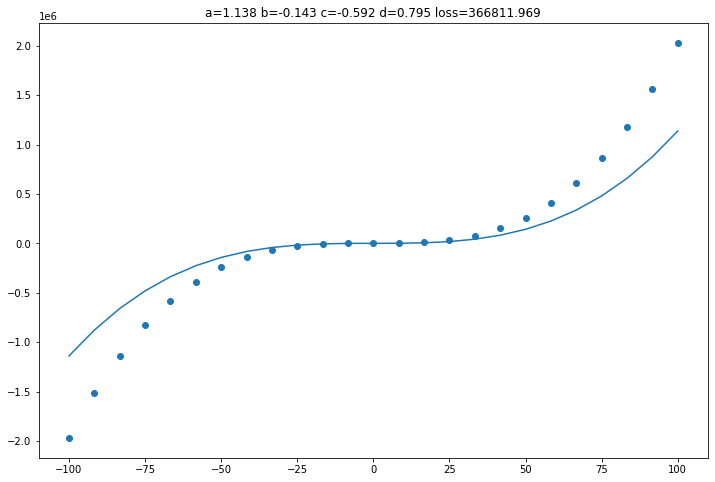

In [8]:
plot(theta, x, y)

In [9]:
@jit
def update(theta, x, y, step_size):
    grad_theta = grad(loss)(theta, x, y)
    return theta - grad_theta * step_size

In [10]:
def train(theta, x, y, iterations=1, step_size=0.0000003):
    for _ in range(iterations):
        theta = update(theta, x, y, step_size)
    plot(theta, x, y)
    return theta

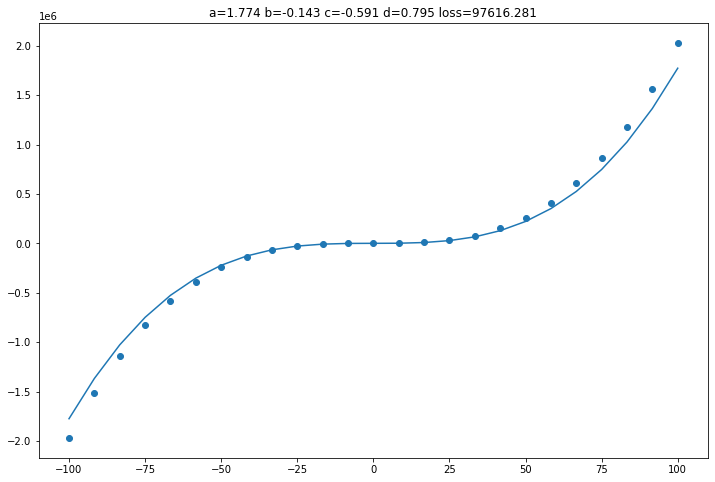

In [15]:
theta = train(theta, x, y)

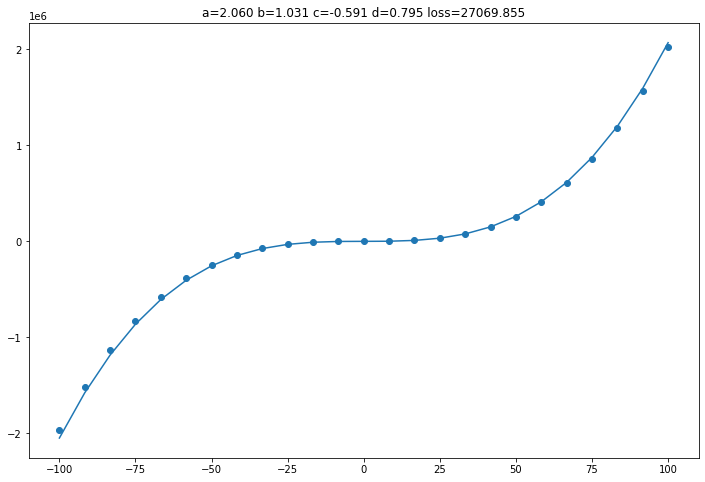

In [24]:
theta = train(theta, x, y, iterations=100)